This is about calculating the standard deviation and coefficient of variation analytically in a bitstring representation. We can also calculate by generating the transition probabilities and carrying the standard deviation calculation as usual.

In [123]:
from sympy import Symbol, Rational, binomial, simplify, sqrt
import math
import os.path
import matplotlib.pyplot as plt
import scipy.misc
%matplotlib inline

In a bitstring space of length $n$, the size of the space is $2^n$. The sum of transition probabilities is $1$, so the mean transition probability is $1/2^n$.

In a per-individual mutation (ie we carry out one bit-flip per mutation event), there are $n$ neighbours, each with transition probability $t=1/n$. There are $2^n-n$ non-neighbours, and for each $t=0$. Therefore the variance

$$v = \frac{n(1/n - 1/2^n)^2 + (2^n-n)(0 - 1/2^n)^2}{2^n}$$

So $\sigma = \sqrt{v}$.

This simplies (see Sympy simplification below).

FIXME check operator precedence above!

In [100]:
n = Symbol('n', integer=True)
sigma = sqrt(n * (1/n - 1/(2**n))**2 + (2**n-n) * (0 - 1/2**n)**2) / (2**n)

In [101]:
sigma

2**(-n)*sqrt(n*(1/n - 2**(-n))**2 + 2**(-2*n)*(2**n - n))

In [110]:
sigma = simplify(sigma)

In [111]:
sigma

2**(-3*n/2)*sqrt((2**n - n)/n)

In [109]:
sigma.subs(n, 10).evalf()

0.000307304586796243

In [115]:
def get_sd(i):
    return sigma.subs(n, i).evalf()
def get_cv(i):
    return get_sd(i) * 2**i

In [116]:
get_sd(10).evalf()

0.000307304586796243

In [117]:
basedir = "/Users/jmmcd/Dropbox/GPDistance/results/space_bitstring/"

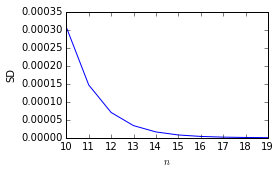

In [118]:
fig = plt.figure(figsize=(4,2.5))
ax = fig.add_subplot(111)
ax.plot(range(10, 20), [get_sd(i) for i in range(10, 20)])
plt.xlabel("$n$")
plt.ylabel("SD")
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig(os.path.join(basedir, 'SD_Analytically.pdf'))
del ax
del fig

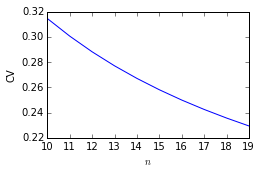

In [119]:
fig = plt.figure(figsize=(4,2.5))
ax = fig.add_subplot(111)
ax.plot(range(10, 20), [get_cv(i) for i in range(10, 20)])
plt.xlabel("$n$")
plt.ylabel("CV")
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig(os.path.join(basedir, 'CV_Analytically.pdf'))
del ax
del fig

In a per-gene mutation, where the per-gene mutation probability is $p$, the transition probability to an individual whose Hamming distance is $h$ is $$p^h (1 - p)^{n - h}$$

How many individuals are there at Hamming distance $h$? For $h=0$, 1. For $h=1$, $n$. For $h=2$, n-choose-2. In general, it's n-choose-h, ie $$\binom{n}{h}$$

As in the per-individual mutation above, the mean value of $t$ is $1/2^n$. So the variance $$v = \frac{\sum_{h=0}^n \left(\binom{n}{h} (p^h (1-p)^{n-h}) - 1/2^n \right)^2}{2^n}$$

Again $\sigma = \sqrt{v}$.

In [81]:
nCk = lambda n, k: scipy.misc.comb(n, k, True)

In [125]:
n = 10
p = 0.001
sigma_f = math.sqrt(sum(
        (nCk(n, h) * p**h * (1-p)**(n-h) - 1/2**n)**2
        for h in range(n)
         ) / (2**n))

#(pm ** h) * ((1.0 - pm) ** (n - h))

In [126]:
sigma_f


0.03094045254284038

Next step: carry out the sympy calculations to get an analytic expression.